In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as patches
import datetime as dt

In [441]:
df = pd.read_csv('sw_results.csv')
df['D_int'][df['D_int'] > 10] = 9.5

/tmp/ipykernel_22729/3089951155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['D_int'][df['D_int'] > 10] = 9.5


0.0427391796035127
0.0034460978372712614


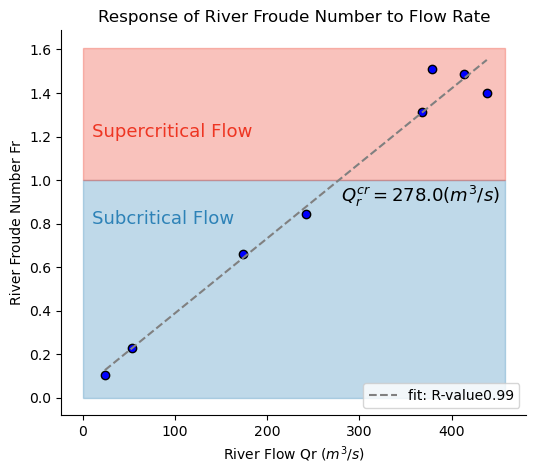

In [442]:
subcritical = patches.Rectangle((0, 0), df['Qr'].max()+20, 1, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
supercritical = patches.Rectangle((0, 1), df['Qr'].max()+20, df['Fr'].max()-0.9, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)


QrFr = stats.linregress(df['Qr'], df['Fr'])
Qr_crit = (1 - QrFr.intercept)/QrFr.slope

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.add_patch(subcritical)
ax.add_patch(supercritical)

ax.plot(df['Qr'], df['Fr'],'bo',markeredgecolor='k')
ax.plot(df['Qr'].sort_values(ascending=True), QrFr.intercept + QrFr.slope * df['Qr'].sort_values(ascending=True), 'grey', linestyle='--',label=r'fit: R-value'+str(round(QrFr.rvalue, 2)))
ax.set_xlabel(r"River Flow Qr $(m^3/s)$")
ax.set_ylabel('River Froude Number Fr')
ax.set_title('Response of River Froude Number to Flow Rate')
ax.legend(loc='lower right')

ax.text(10, 0.8, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(10, 1.2, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(280, 0.90, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(QrFr.intercept)
print(QrFr.slope)

In [443]:
def Fr_from_Qr(Qr):
    return QrFr.slope * Qr + QrFr.intercept

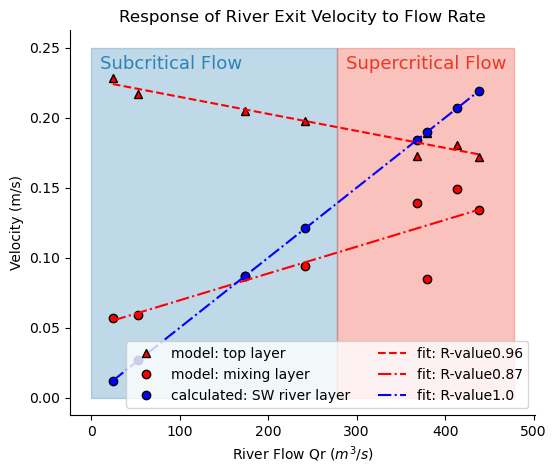

In [444]:
est = patches.Rectangle((0, 0), 278, 0.25, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
flushed = patches.Rectangle((278, 0), df['Qr'].max()-278+40, 0.25, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)

QrVmix = stats.linregress(df['Qr'], -df['V_mix'])
QrVtop = stats.linregress(df['Qr'], -df['V_top'])
Qruexit = stats.linregress(df['Qr'], df['u_exit'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.add_patch(est)
ax.add_patch(flushed)

ax.plot(df['Qr'], -df['V_top'],'r^',markeredgecolor='k',label='model: top layer')
ax.plot(df['Qr'], -df['V_mix'],'ro',markeredgecolor='k',label='model: mixing layer')
ax.plot(df['Qr'], df['u_exit'],'bo',markeredgecolor='k',label='calculated: SW river layer')


ax.plot(df['Qr'].sort_values(ascending=True), QrVtop.intercept + QrVtop.slope * df['Qr'].sort_values(ascending=True), 'r--',label=r'fit: R-value'+str(round(-QrVtop.rvalue, 2)))
ax.plot(df['Qr'].sort_values(ascending=True), QrVmix.intercept + QrVmix.slope * df['Qr'].sort_values(ascending=True), 'r', linestyle='dashdot',label=r'fit: R-value'+str(round(QrVmix.rvalue, 2)))
ax.plot(df['Qr'].sort_values(ascending=True), Qruexit.intercept + Qruexit.slope * df['Qr'].sort_values(ascending=True), 'b', linestyle='dashdot',label=r'fit: R-value'+str(round(Qruexit.rvalue, 2)))

ax.set_xlabel(r'River Flow Qr $(m^3/s)$')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Response of River Exit Velocity to Flow Rate')
ax.legend(ncol=2)

ax.text(10, 0.235, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(288, 0.235, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

3.2109351713984644
0.016627544460665954


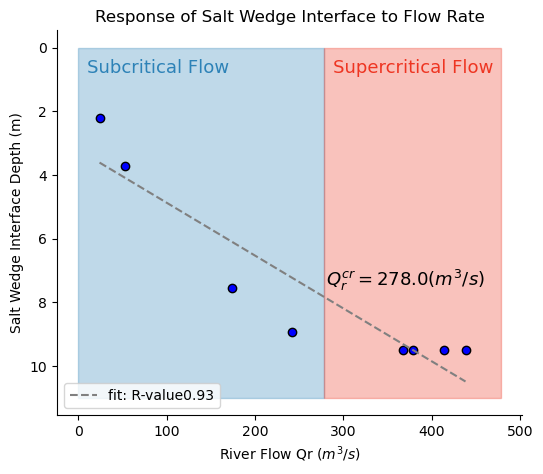

In [445]:
est = patches.Rectangle((0, 0), 278, 11, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
flushed = patches.Rectangle((278, 0), df['Qr'].max()-278+40, 11, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)


QrDint = stats.linregress(df['Qr'], df['D_int'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.add_patch(est)
ax.add_patch(flushed)

ax.plot(df['Qr'], df['D_int'],'bo',markeredgecolor='k')
ax.plot(df['Qr'].sort_values(ascending=True), QrDint.intercept + QrDint.slope * df['Qr'].sort_values(ascending=True), 'grey', linestyle='--',label=r'fit: R-value'+str(round(QrDint.rvalue, 2)))
ax.set_xlabel(r'River Flow Qr $(m^3/s)$')
ax.set_ylabel('Salt Wedge Interface Depth (m)')
ax.set_title('Response of Salt Wedge Interface to Flow Rate')
ax.legend(loc='lower left')
ax.invert_yaxis()

ax.text(10, 0.8, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(288, 0.8, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(280, 7.5, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(QrDint.intercept)
print(QrDint.slope)

In [446]:
def entrainment_vel(u_exit, h0, delta_x, S_top_prime, S_bot_prime, S_top, S_bot):
    return ((u_exit * h0)/delta_x) * ((S_top_prime - S_top)/((S_bot + S_bot_prime)/2 - S_top_prime))


In [447]:
deltax = 4400  # meters
We = 3000  # meters, width of the estuary
df['wE1'] = entrainment_vel(df['u_exit'], df['D_int'], deltax, df['S_top_mix'], df['S_bot_mix'], df['S_top'], df['S_bot'])
df['wE2'] = entrainment_vel(-df['V_mix'], df['D_int'], deltax, df['S_top_mix'], df['S_bot_mix'], df['S_top'], df['S_bot'])

df['Qe1'] = df['wE1'] * deltax * We
df['Qe2'] = df['wE2'] * deltax * We

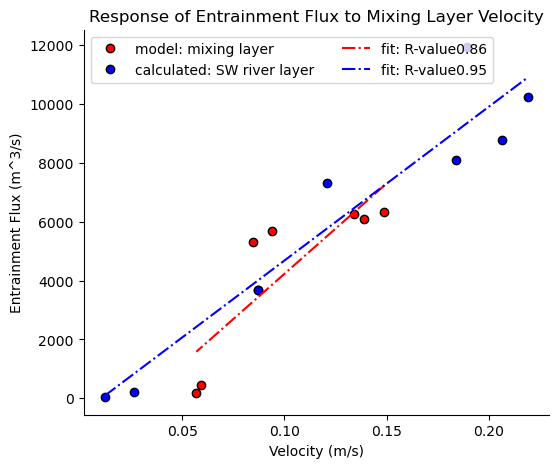

In [448]:
VmixQe2 = stats.linregress(-df['V_mix'], df['Qe2'])
uexitQe1 = stats.linregress(df['u_exit'], df['Qe1'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))


ax.plot(-df['V_mix'], df['Qe2'],'ro', markeredgecolor='k',label='model: mixing layer')
ax.plot(df['u_exit'], df['Qe1'],'bo', markeredgecolor='k',label='calculated: SW river layer')

ax.plot(-df['V_mix'].sort_values(ascending=True), VmixQe2.intercept + VmixQe2.slope * -df['V_mix'].sort_values(ascending=True), 'r', linestyle='dashdot',label=r'fit: R-value'+str(round(VmixQe2.rvalue, 2)))
ax.plot(df['u_exit'].sort_values(ascending=True), uexitQe1.intercept + uexitQe1.slope * df['u_exit'].sort_values(ascending=True), 'b', linestyle='dashdot',label=r'fit: R-value'+str(round(uexitQe1.rvalue, 2)))



ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Entrainment Flux (m^3/s)')
ax.set_title('Response of Entrainment Flux to Mixing Layer Velocity')
ax.legend(ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [449]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Squamish_Brackendale_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
river = riv_df.rename(columns=mapping)
riv_10 = river[river['YYYY'] >= 2013]
riv_10['DateTime'] = pd.to_datetime(dict(year=riv_10['YYYY'], month=riv_10['MM'], day=riv_10['DD']))

/tmp/ipykernel_22729/1575600269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riv_10['DateTime'] = pd.to_datetime(dict(year=riv_10['YYYY'], month=riv_10['MM'], day=riv_10['DD']))


In [450]:
riv_10

,YYYY,MM,DD,DISCHARGE,4,DateTime
21607,2013,1,1,30.00000,NaN,2013-01-01
21608,2013,1,2,35.00000,NaN,2013-01-02
21609,2013,1,3,38.10000,NaN,2013-01-03
21610,2013,1,4,30.90000,NaN,2013-01-04
21611,2013,1,5,31.90000,NaN,2013-01-05
...,...,...,...,...,...,...
25369,2023,4,21,57.38947,NaN,2023-04-21
25370,2023,4,22,54.81875,NaN,2023-04-22
25371,2023,4,23,66.58924,NaN,2023-04-23
25372,2023,4,24,91.88056,NaN,2023-04-24


In [451]:
(pd.to_datetime(riv_10['DateTime'][21607]) - dt.datetime(1970,1,1))

Timedelta('15706 days 00:00:00')

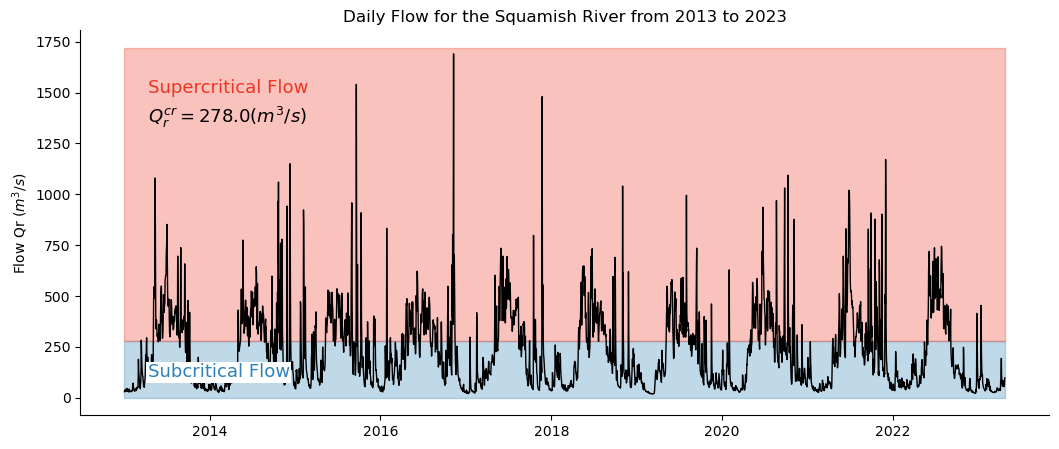

In [452]:
subcritical = patches.Rectangle((0+15706 , 0), len(riv_10), Qr_crit, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
supercritical = patches.Rectangle((0+15706 , Qr_crit), len(riv_10), riv_10['DISCHARGE'].max()-Qr_crit+30, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))

ax.add_patch(subcritical)
ax.add_patch(supercritical)

ax.plot(riv_10['DateTime'], riv_10['DISCHARGE'],'k',linewidth=1)
ax.set_ylabel(r'Flow Qr $(m^3/s)$')
ax.set_title('Daily Flow for the Squamish River from 2013 to 2023')

ax.text(100+15706, 100, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13}, bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax.text(100+15706, 1500, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(100+15706, 1350, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [453]:
sup_days = (riv_10['DISCHARGE'] > Qr_crit).sum()
sub_days = (riv_10['DISCHARGE'] < Qr_crit).sum()
total_days = (riv_10['DISCHARGE'] > 0).sum()

In [454]:
print('Percent supercritical: {}'.format(str(100*round(sup_days/total_days, 2))))
print('Percent subcritical: {}'.format(str(100*round(sub_days/total_days, 2))))

Percent supercritical: 35.0
Percent subcritical: 65.0


## force a prediction here

In [455]:
river_2018 = river[river['YYYY'] == 2019]
river_2018['DateTime'] = pd.to_datetime(dict(year=river_2018['YYYY'], month=river_2018['MM'], day=river_2018['DD']))
river_mod = river_2018.copy()
river_mod['DISCHARGE'] = river_2018['DISCHARGE'].values*0.7
river_mod['DISCHARGE'][210:220] = river_mod['DISCHARGE'][120:130]*5
river_mod['DISCHARGE'][255:265] = river_mod['DISCHARGE'][255:265]*2
river_mod['DISCHARGE'][315:325] = river_mod['DISCHARGE'][315:325]*2
# river_mod['DISCHARGE'] = np.log(river_mod['DISCHARGE'])*river_2018['DISCHARGE'].max()
# n_largest = river_mod.nlargest(10, 'DISCHARGE').index.values

/tmp/ipykernel_22729/897929732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  river_2018['DateTime'] = pd.to_datetime(dict(year=river_2018['YYYY'], month=river_2018['MM'], day=river_2018['DD']))
/tmp/ipykernel_22729/897929732.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  river_mod['DISCHARGE'][210:220] = river_mod['DISCHARGE'][120:130]*5
/tmp/ipykernel_22729/897929732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [456]:
# scale_up = river_mod.nlargest(10, 'DISCHARGE')
# scale_up['DISCHARGE'] = scale_up['DISCHARGE']* 1.4
# scale_up

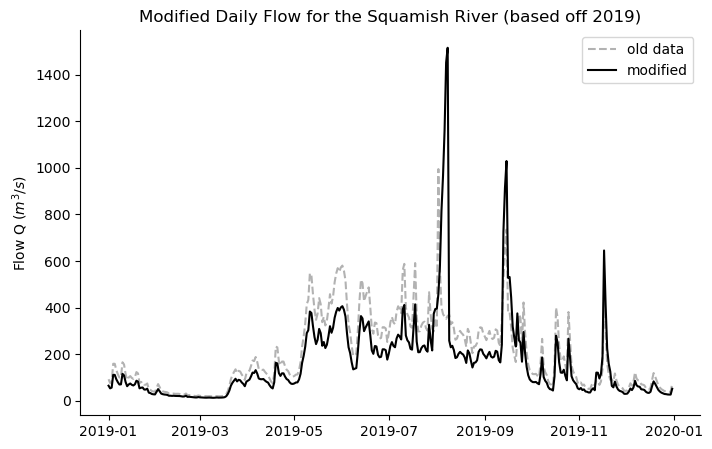

In [457]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(river_2018['DateTime'], river_2018['DISCHARGE'],'k',alpha=0.3,linestyle='--',label='old data')
ax.plot(river_mod['DateTime'], river_mod['DISCHARGE'],'k',label='modified')
ax.set_ylabel(r'Flow Q $(m^3/s)$')
ax.set_title('Modified Daily Flow for the Squamish River (based off 2019)')

ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [458]:
river_mod['Fr_pred'] = Fr_from_Qr(river_mod['DISCHARGE'].values)

In [459]:
sup_days = (river_mod['DISCHARGE'] > Qr_crit).sum()
sub_days = (river_mod['DISCHARGE'] < Qr_crit).sum()
total_days = (river_mod['DISCHARGE'] > 0).sum()

In [460]:
print('Percent supercritical: {}'.format(str(100*round(sup_days/total_days, 2))))
print('Percent subcritical: {}'.format(str(100*round(sub_days/total_days, 2))))

Percent supercritical: 15.0
Percent subcritical: 85.0


In [461]:
# subcritical = patches.Rectangle((0, 0), river_mod['DISCHARGE'].max()+20, 1, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
# supercritical = patches.Rectangle((0, 1), river_mod['DISCHARGE'].max()+20, Fr_pred.max()-0.9, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)

# fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# ax.add_patch(subcritical)
# ax.add_patch(supercritical)

# ax.plot(river_mod['DISCHARGE'], Fr_pred,'bo',markeredgecolor='k')
# ax.set_xlabel(r"River Flow Qr $(m^3/s)$")
# ax.set_ylabel('River Froude Number Fr')
# ax.set_title('Response of River Froude Number to Flow Rate')
# ax.legend(loc='lower right')

# ax.text(10, 0.8, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
# ax.text(10, 1.2, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
# ax.text(280, 0.90, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)